Saving gender_submission.csv to gender_submission (1).csv
Saving test.csv to test (1).csv
Saving train.csv to train (1).csv
First few rows of the training data:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  


<ipython-input-2-0feaf7b9d8ff>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Women', 'Men'], y=[rate_women, rate_men], palette='viridis')


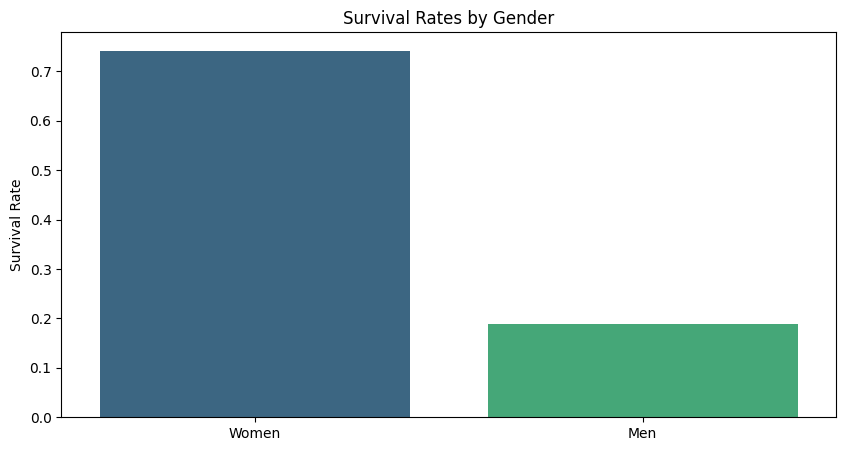


Your submission was successfully saved as 'submission.csv'!


<ipython-input-2-0feaf7b9d8ff>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=train_data, palette='viridis')


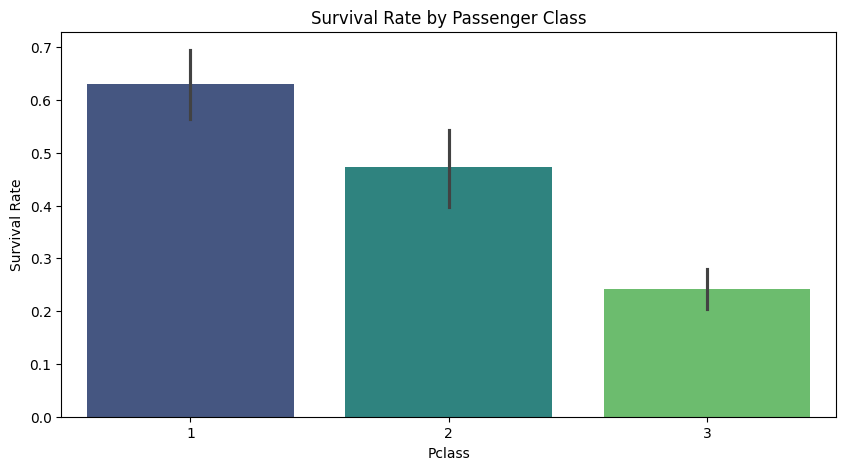

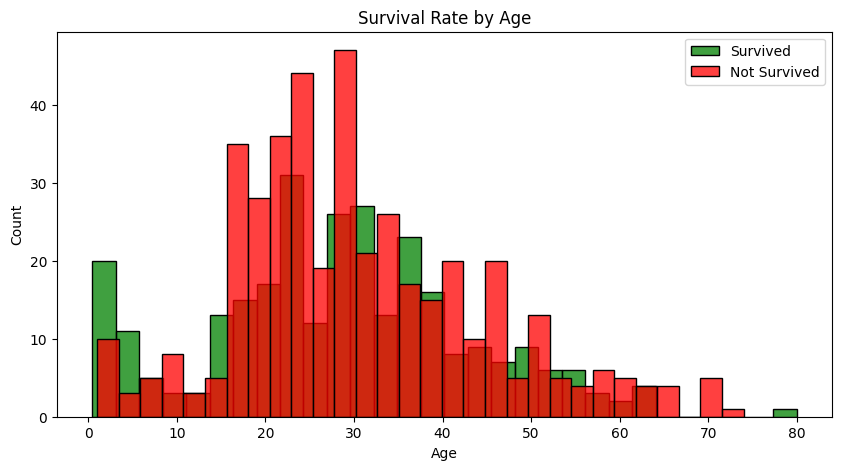

In [ ]:

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

uploaded = files.upload()

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

print("First few rows of the training data:")
print(train_data.head())
print("\nBasic information about the training data:")
print(train_data.info())

print("\nSummary statistics of the training data:")
print(train_data.describe())

# Calculate the survival rate of women
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women) / len(women)
print("\n% of women who survived:", rate_women)

# Calculate the survival rate of men
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men) / len(men)
print("% of men who survived:", rate_men)

# Visualize the survival rates by gender
plt.figure(figsize=(10, 5))
sns.barplot(x=['Women', 'Men'], y=[rate_women, rate_men], palette='viridis')
plt.title('Survival Rates by Gender')
plt.ylabel('Survival Rate')
plt.show()

# Prepare the data for the RandomForest model
y = train_data["Survived"]
features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

# Train the RandomForest model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

# Save the predictions to a CSV file
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("\nYour submission was successfully saved as 'submission.csv'!")

# Additional Visualizations
# Survival rate by Pclass
plt.figure(figsize=(10, 5))
sns.barplot(x='Pclass', y='Survived', data=train_data, palette='viridis')
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

# Survival rate by Age
plt.figure(figsize=(10, 5))
sns.histplot(train_data[train_data['Survived'] == 1]['Age'], bins=30, kde=False, color='green', label='Survived')
sns.histplot(train_data[train_data['Survived'] == 0]['Age'], bins=30, kde=False, color='red', label='Not Survived')
plt.legend()
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
